# Power Analysis

Power Analysis is a method used in experimental design to estimate the minimum sample size required for a study. It involves the concepts of statistical power, effect size, significance level, and sample size. The statistical power is the probability that the study will give a significant result. The effect size is the measure of the magnitude of the phenomenon being measured in the population. Significance level is the probability of rejecting the null hypothesis when it is true.

In this notebook, we are going to discuss how power analysis can be used to determine the sample size for an experiment.

## Importing Required Libraries

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Power Analysis

Consider an example where we have two drugs A and B for treating a virus. We have recovery times for 3 people using drug A and 3 people using drug B. We want to know if drug A is better than drug B.

We calculate the means of recovery times for both drugs and do a statistical test to compare the means. If the p-value is greater than 0.05, we can't say that drug A is better than drug B.

In order to avoid p-hacking, which involves changing your hypothesis to match your data or stopping data collection when you reach a significant p-value, we will do a power analysis to determine the sample size for the next time we do this experiment.

A power analysis determines what sample size will ensure a high probability that we will correctly reject the null hypothesis that there is no difference between the two groups. In other words, if we use the sample size recommended by the power analysis, we will know that regardless of the p-value, we used enough data to make a good decision.


## Factors Affecting Power

Power is affected by several things, however, there are two main factors:

1. How much overlap there is between the two distributions we want to identify with our study.
2. The sample size - the number of measurements we collect from each group.

To understand the relationship between overlap and sample size, we need to realize that when we do a statistical test, we usually don't compare the individual measurements. Instead, we compare summaries of the data. For example, we often compare the means.

Let's see what happens when we calculate means with different sample sizes.


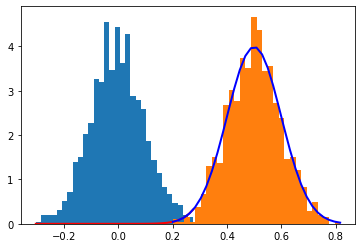

In [2]:
# Normal distributions
np.random.seed(0)
mu, sigma = 0, 0.1 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 1000)
mu, sigma = 0.5, 0.1
s2 = np.random.normal(mu, sigma, 1000)

# Plotting the distributions
count, bins, ignored = plt.hist(s1, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
       linewidth=2, color='r')
count, bins, ignored = plt.hist(s2, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
       linewidth=2, color='b')
plt.show()

The more measurements we use for each estimate, the closer they are to the population mean and the more confidence we can have that an individual estimated mean will be close to the population mean. This is due to the Central Limit Theorem which states that if we take enough samples from a population, the means of the samples will form a normal distribution, regardless of the shape of the population distribution. This is why power analysis results apply to any underlying distribution.

When the estimated means are so close to the population means that they no longer overlap, that suggests there is a high probability that we will correctly reject the null hypothesis that both samples were taken from the same distribution. In other words, even when the distributions overlap, if the sample size is large we can have high power.

## Power Analysis

In power analysis, we need to decide the power level and the threshold for significance often called alpha. By convention, we often use power level of 0.8 and alpha of 0.05.

We also need to estimate the overlap between the two distributions. Overlap is affected by both the distance between the population means and the standard deviations. A common way to combine the distance between the means and the standard deviations into a single metric is to calculate an effect size (d).

$$d = \frac{{\bar{x}_1 - \bar{x}_2}}{{\sqrt{\frac{{s_1^2 + s_2^2}}{2}}}}$$

where $\bar{x}_1$ and $\bar{x}_2$ are the estimated means, and $s_1$ and $s_2$ are the estimated standard deviations.

Once we know the effect size, the power level and the significance level, we can calculate the sample size using power calculator from statsmodels library.

In [3]:
# Importing power analysis library
from statsmodels.stats.power import TTestIndPower

# Parameters for power analysis
effect = 0.5
alpha = 0.05
power = 0.8

# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 63.766


/Users/amirhosseindaraie/miniconda3/envs/my_base/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/amirhosseindaraie/miniconda3/envs/my_base/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/amirhosseindaraie/miniconda3/envs/my_base/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/amirhosseindaraie/miniconda3/envs/my_base/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


This means that if we get this many measurements per group, we will have an 80% chance that we will correctly reject the null hypothesis.

In conclusion, power analysis is a useful tool to determine the sample size for an experiment. By ensuring that we have a high statistical power, we can be more confident in the results of our statistical tests and avoid the pitfalls of p-hacking.

## References

[1] Cohen, J. (1988). Statistical power analysis for the behavioral sciences (2nd ed.). Hillsdale, NJ: Lawrence Erlbaum Associates.

[2] Faul, F., Erdfelder, E., Buchner, A., & Lang, A.-G. (2009). Statistical power analyses using G*Power 3.1: Tests for correlation and regression analyses. Behavior Research Methods, 41, 1149-1160.

[3] Faul, F., Erdfelder, E., Lang, A.-G., & Buchner, A. (2007). G*Power 3: A flexible statistical power analysis program for the social, behavioral, and biomedical sciences. Behavior Research Methods, 39, 175-191.